# Example Notebook #2
This notebook illustrates a portfolio construction process with the use of the `RiskModel` object. Its main purpose is to select a set of assets out of the investment universe characterised by the securities attribute in the `Portfolio` class. In this way, the process is repeated periodically forming a quantile spread on the selected factor. This simple dynamic factor allocation strategy can be backtested...

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%load_ext autoreload
%autoreload 2
plt.style.use('bmh')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
os.chdir('C:\\Users\matus\pysource\portfolio-swissknife')

In [3]:
from portfolio import Portfolio
from risk_model import RiskModel
import estimation as est
import optimization as opt
import plotting
import metrics

In [7]:
#loading ext. data -- close prices of SPX
universe = pd.read_csv('ext_data/00_db_SPX__PX_LAST.csv', index_col = 0, parse_dates = True)
universe = universe[::-1].loc[:,universe.notna().all(axis=0)]
securities = [universe.columns[i].split(' ')[0] for i, _ in enumerate(universe.columns)]
universe = universe.loc['2014':]

In [8]:
port_universe = Portfolio(securities)
port_universe.set_custom_prices(universe, 'daily')

In [15]:
factors = ['SPY', 'VLUE', 'SIZE', 'QUAL', 'MTUM', 'USMV']
rm_universe = RiskModel(port_universe, factors)
rm_universe.get_prices('daily')

[*********************100%***********************]  6 of 6 completed


In [19]:
rm_universe.returns.shape

(1771, 6)

In [30]:
a, b, c = rm_universe._estimate_panel(method='linear')

In [33]:
b.shape

(403, 6)

In [52]:
sort = np.argsort(b[:,0])

<BarContainer object of 403 artists>

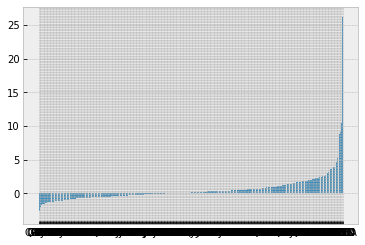

In [63]:
plt.bar(height=b[:,0][sort],x=np.array(rm_universe.portfolio.securities)[sort])

In [57]:
np.array(rm_universe.portfolio.securities)[sort]

array(['CMG', 'UAL', 'QCOM', 'AES', 'GRMN', 'PWR', 'PEAK', 'PG', 'AZO',
       'HES', 'AAP', 'JCI', 'HSY', 'FCX', 'WELL', 'DISCA', 'OKE', 'KIM',
       'ETR', 'SO', 'CPB', 'MRK', 'GIS', 'XRAY', 'FAST', 'KSU', 'DOV',
       'CMI', 'WU', 'J', 'TGT', 'PCAR', 'WHR', 'ZBH', 'XRX', 'DFS', 'O',
       'DIS', 'BLL', 'ETN', 'SRE', 'KLAC', 'KMB', 'DISH', 'T', 'TSCO',
       'KMX', 'LEG', 'PPL', 'FE', 'AKAM', 'PPG', 'DVA', 'GPC', 'FLS',
       'PH', 'NLOK', 'GWW', 'EIX', 'VZ', 'CMCSA', 'RTX', 'D', 'EMR',
       'CINF', 'MAA', 'INCY', 'MLM', 'MET', 'KR', 'IBM', 'ES', 'AMP',
       'SBUX', 'OMC', 'EQR', 'AVB', 'UNP', 'VTR', 'TT', 'APD', 'COF',
       'BXP', 'NSC', 'ADM', 'FMC', 'CL', 'DUK', 'AXP', 'UHS', 'ECL',
       'HSIC', 'ALK', 'KO', 'LIN', 'WRB', 'ORLY', 'URI', 'MCK', 'WMT',
       'CB', 'ESS', 'TDG', 'MDT', 'PAYX', 'TJX', 'CVX', 'CAH', 'USB',
       'WEC', 'SJM', 'IPG', 'RE', 'AIZ', 'PNR', 'EVRG', 'UDR', 'DTE',
       'SNA', 'EFX', 'TSN', 'K', 'UPS', 'NEM', 'GS', 'CNP', 'DRE', 'L',
       'F